<center><h1>Sun_Kaiyi_HW7</h1></center>

# Number of Late days utilized: 1

Name: Kaiyi Sun 
<br>
Github Username: KaiyiSss
<br>
USC ID: 6511379529

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import hamming as hammingDistance
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

In [2]:
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### (a) Download the Anuran Calls (MFCCs) Data Set

In [3]:
data = pd.read_csv('../data/Frogs_MFCCs.csv')

In [4]:
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [13]:
label_columns = data.columns

Change all classification columns to type category

In [14]:
data.Family = data.Family.astype('category')
data.Genus = data.Genus.astype('category')
data.Species = data.Species.astype('category')
data.RecordID = data.RecordID.astype('category')

# Get Train and Test Data

In [15]:
X, y = data.iloc[:,:-4], data.iloc[:,-4:]
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size=0.7,shuffle=True)
standarizer = StandardScaler()
train_x_standarized = standarizer.fit_transform(train_x)
test_x_standarized = standarizer.fit_transform(test_x)

In [16]:
family_trainY,family_testY = train_y.Family, test_y.Family
genus_trainY,genus_testY = train_y.Genus, test_y.Genus
species_trainY,species_testY = train_y.Species, test_y.Species

### (b) Train a classifier for each label

#### (i) Research

Exact Match: Count a row in prediction as matched only if all the labels match.

Hamming Loss: For each label and row count the number of mismatched labels then average.

Reference:
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics


In [21]:
# Count the number of missed values
def findMissedInColumn(y, y_hat):
    return sum(y.values != y_hat.values)

# Find the hamming score
def calculateHammingScore(y, y_hat):
    missed_points = 0
    for i in y:
        missed_points += findMissedInColumn(y[i], y_hat[i])
    hamming_loss = missed_points / (y.shape[0] * y.shape[1])
    return hamming_loss

# Get the Exact Match Ratio
def calculateExactMatchRatio(y, y_hat):
    y_values = y.values
    y_hat_values = y_hat.values
    matched = sum(np.sum((y_values == y_hat_values),axis=1) == y_hat.shape[1])
    match_ratio = matched / y_hat.shape[0]
    return match_ratio
# Print the results
def printResults(y, y_hat):
    exact_match = calculateExactMatchRatio(y,y_hat)
    hamming = calculateHammingScore(y, y_hat)
    result = {'Exact Match': exact_match,
             'Hamming Loss': hamming,
             'Hamming Score': 1- hamming}
    return result

#### (ii) Train a SVM for each of the labels

In [22]:
# After long runs and trial and error choosing a shorter range to get faster results
model_parameters = {'C':np.logspace(-2,6,9),
                 'gamma':np.arange(0.1,2.1,0.1)}
cv = StratifiedKFold(10, random_state=25, shuffle=True)
svm_search_parameters = {'param_grid': model_parameters,'cv':cv}
svc_model = SVC()

In [23]:
def runGridSearch(title, estimator, grid_parameters, train, test):
    grid = GridSearchCV(estimator, **grid_parameters, verbose=1, n_jobs=-1)
    grid.fit(train, test)
    grid_mean, grid_params = grid.cv_results_['mean_test_score'],grid.cv_results_['params']
    print('Grid Search for {}'.format(title))
    print('Best Parameters: {}'.format(grid.best_params_))
    scores = pd.DataFrame({'Mean': grid_mean, 'Params': grid_params})
    display(scores)
    return grid

#### Family

In [24]:
grid_family_svm = runGridSearch('Data: Family, Type: Non-Standarized SVM', svc_model, svm_search_parameters, train_x, family_trainY)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

Grid Search for Data: Family, Type: Non-Standarized SVM

Best Parameters: {'C': 100.0, 'gamma': 1.9000000000000001}


,Mean,Params
0,0.615766,"{'C': 0.01, 'gamma': 0.1}"
1,0.734905,"{'C': 0.01, 'gamma': 0.2}"
2,0.827043,"{'C': 0.01, 'gamma': 0.30000000000000004}"
3,0.829427,"{'C': 0.01, 'gamma': 0.4}"
4,0.828235,"{'C': 0.01, 'gamma': 0.5}"
...,...,...
175,0.992257,"{'C': 1000000.0, 'gamma': 1.6}"
176,0.992852,"{'C': 1000000.0, 'gamma': 1.7000000000000002}"
177,0.992852,"{'C': 1000000.0, 'gamma': 1.8000000000000003}"
178,0.993051,"{'C': 1000000.0, 'gamma': 1.9000000000000001}"


#### Genus

In [25]:
grid_genus_svm = runGridSearch('Data: Genus, Type: Non-Standarized SVM', svc_model, svm_search_parameters, train_x, genus_trainY)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

Grid Search for Data: Genus, Type: Non-Standarized SVM

Best Parameters: {'C': 10.0, 'gamma': 2.0}


,Mean,Params
0,0.575258,"{'C': 0.01, 'gamma': 0.1}"
1,0.645750,"{'C': 0.01, 'gamma': 0.2}"
2,0.749202,"{'C': 0.01, 'gamma': 0.30000000000000004}"
3,0.790110,"{'C': 0.01, 'gamma': 0.4}"
4,0.792692,"{'C': 0.01, 'gamma': 0.5}"
...,...,...
175,0.989872,"{'C': 1000000.0, 'gamma': 1.6}"
176,0.990269,"{'C': 1000000.0, 'gamma': 1.7000000000000002}"
177,0.990468,"{'C': 1000000.0, 'gamma': 1.8000000000000003}"
178,0.990667,"{'C': 1000000.0, 'gamma': 1.9000000000000001}"


#### Species

In [26]:
grid_species_svm = runGridSearch('Data: Species, Type: Non-Standarized SVM', svc_model, svm_search_parameters, train_x, species_trainY)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

Grid Search for Data: Species, Type: Non-Standarized SVM

Best Parameters: {'C': 100.0, 'gamma': 1.2000000000000002}


,Mean,Params
0,0.483717,"{'C': 0.01, 'gamma': 0.1}"
1,0.620930,"{'C': 0.01, 'gamma': 0.2}"
2,0.666405,"{'C': 0.01, 'gamma': 0.30000000000000004}"
3,0.737294,"{'C': 0.01, 'gamma': 0.4}"
4,0.784753,"{'C': 0.01, 'gamma': 0.5}"
...,...,...
175,0.990071,"{'C': 1000000.0, 'gamma': 1.6}"
176,0.990071,"{'C': 1000000.0, 'gamma': 1.7000000000000002}"
177,0.990071,"{'C': 1000000.0, 'gamma': 1.8000000000000003}"
178,0.990072,"{'C': 1000000.0, 'gamma': 1.9000000000000001}"


#### Predictions

In [27]:
best_models = [grid_family_svm, grid_genus_svm, grid_species_svm]

# Get predicted values for each classification

y_hat_all = {'Family':[], 'Genus':[],'Species':[]}
for i in range(3):
    model = best_models[i]
    label = list(y_hat_all.keys())[i]
    y_hat_all[label] = model.predict(test_x)
predictions_svm = pd.DataFrame(y_hat_all)
predictions_svm

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Osteocephalus,OsteocephalusOophagus
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Leptodactylus,LeptodactylusFuscus
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


#### SVM: Exact Match, Hamming Loss, Hamming Score

In [28]:
svm_scores = printResults(test_y.iloc[:,:-1], predictions_svm)
pd.DataFrame(svm_scores,index=['Values'])

,Exact Match,Hamming Loss,Hamming Score
Values,0.986568,0.008337,0.991663


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [29]:
# After long runs and trial and error choosing a shorter range to get faster results
# Initial try: C from -3 to 6 after running mean score is above 0.7 only for range -2 to 6 so changed

L1model_parameters =  {'C': np.logspace(-2,6,9)}
L1_search_parameters = {'param_grid': L1model_parameters,'cv':cv}
linear_svc = LinearSVC(penalty='l1', dual=False)

#### Family

In [30]:
grid_family_l1 = runGridSearch('Data: Family, Type: SVC L1', linear_svc, L1_search_parameters, train_x_standarized, family_trainY)

Fitting 10 folds for each of 9 candidates, totalling 90 fits

Grid Search for Data: Family, Type: SVC L1

Best Parameters: {'C': 1.0}


,Mean,Params
0,0.927124,{'C': 0.01}
1,0.934672,{'C': 0.1}
2,0.935665,{'C': 1.0}
3,0.935070,{'C': 10.0}
4,0.935070,{'C': 100.0}
5,0.935070,{'C': 1000.0}
6,0.935070,{'C': 10000.0}
7,0.935070,{'C': 100000.0}
8,0.935070,{'C': 1000000.0}


#### Genus

In [31]:
grid_genus_l1 = runGridSearch('Data: Genus, Type: SVC L1', linear_svc, L1_search_parameters, train_x_standarized, genus_trainY)

Fitting 10 folds for each of 9 candidates, totalling 90 fits

Grid Search for Data: Genus, Type: SVC L1

Best Parameters: {'C': 100.0}


,Mean,Params
0,0.912035,{'C': 0.01}
1,0.938247,{'C': 0.1}
2,0.947579,{'C': 1.0}
3,0.948373,{'C': 10.0}
4,0.948572,{'C': 100.0}
5,0.948572,{'C': 1000.0}
6,0.948572,{'C': 10000.0}
7,0.948572,{'C': 100000.0}
8,0.948572,{'C': 1000000.0}


#### Species

In [32]:
grid_species_l1 = runGridSearch('Data: Species, Type: SVC L1', linear_svc, L1_search_parameters, train_x_standarized, species_trainY)

Fitting 10 folds for each of 9 candidates, totalling 90 fits

Grid Search for Data: Species, Type: SVC L1

Best Parameters: {'C': 10.0}


,Mean,Params
0,0.912829,{'C': 0.01}
1,0.944995,{'C': 0.1}
2,0.954527,{'C': 1.0}
3,0.956314,{'C': 10.0}
4,0.956116,{'C': 100.0}
5,0.956116,{'C': 1000.0}
6,0.956116,{'C': 10000.0}
7,0.956116,{'C': 100000.0}
8,0.956116,{'C': 1000000.0}


#### Predictions

In [33]:
best_models_l1 = [grid_family_l1, grid_genus_l1, grid_species_l1]

# Get predicted values for each classification
l1_y_hat_all = {'Family':[], 'Genus':[],'Species':[]}
for i in range(3):
    model = best_models_l1[i]
    label = list(l1_y_hat_all.keys())[i]
    l1_y_hat_all[label] = model.predict(test_x_standarized)
predictions_l1 = pd.DataFrame(l1_y_hat_all)
predictions_l1

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Leptodactylus,LeptodactylusFuscus
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


#### SMV L1: Exact Match, Hamming Loss, Hamming Score

In [34]:
l1_scores = printResults(test_y.iloc[:,:-1], predictions_l1)
pd.DataFrame(l1_scores,index=['Values'])

,Exact Match,Hamming Loss,Hamming Score
Values,0.918018,0.051721,0.948279


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [35]:
smote_model_parameters = {'estimator__C': np.logspace(-3,6,10)}
smote_search_parameters = {'param_grid': smote_model_parameters,'cv': cv}
pipeline = Pipeline([('smote', SMOTE()),('estimator', linear_svc)])

#### Family

In [36]:
grid_family_smote = runGridSearch('Data: Family, Type: SMOTE L1', pipeline, smote_search_parameters, train_x_standarized, family_trainY)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Grid Search for Data: Family, Type: SMOTE L1

Best Parameters: {'estimator__C': 10.0}


,Mean,Params
0,0.823079,{'estimator__C': 0.001}
1,0.897743,{'estimator__C': 0.01}
2,0.916011,{'estimator__C': 0.1}
3,0.918393,{'estimator__C': 1.0}
4,0.920380,{'estimator__C': 10.0}
5,0.917798,{'estimator__C': 100.0}
6,0.917798,{'estimator__C': 1000.0}
7,0.919782,{'estimator__C': 10000.0}
8,0.918592,{'estimator__C': 100000.0}
9,0.919584,{'estimator__C': 1000000.0}


#### Genus

In [37]:
grid_genus_smote = runGridSearch('Data: Genus, Type: SMOTE L1', pipeline, smote_search_parameters, train_x_standarized, genus_trainY)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Grid Search for Data: Genus, Type: SMOTE L1

Best Parameters: {'estimator__C': 1000000.0}


,Mean,Params
0,0.871922,{'estimator__C': 0.001}
1,0.910045,{'estimator__C': 0.01}
2,0.915010,{'estimator__C': 0.1}
3,0.917195,{'estimator__C': 1.0}
4,0.917989,{'estimator__C': 10.0}
5,0.917792,{'estimator__C': 100.0}
6,0.916600,{'estimator__C': 1000.0}
7,0.917195,{'estimator__C': 10000.0}
8,0.917591,{'estimator__C': 100000.0}
9,0.918784,{'estimator__C': 1000000.0}


#### Species

In [38]:
grid_species_smote = runGridSearch('Data: Species, Type: SMOTE L1', pipeline, smote_search_parameters, train_x_standarized, species_trainY)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Grid Search for Data: Species, Type: SMOTE L1

Best Parameters: {'estimator__C': 10.0}


,Mean,Params
0,0.933679,{'estimator__C': 0.001}
1,0.952343,{'estimator__C': 0.01}
2,0.953338,{'estimator__C': 0.1}
3,0.953735,{'estimator__C': 1.0}
4,0.954729,{'estimator__C': 10.0}
5,0.952939,{'estimator__C': 100.0}
6,0.954132,{'estimator__C': 1000.0}
7,0.954132,{'estimator__C': 10000.0}
8,0.953536,{'estimator__C': 100000.0}
9,0.953536,{'estimator__C': 1000000.0}


#### Predictions

In [39]:
best_models_smote = [grid_family_smote, grid_genus_smote, grid_species_smote]

# Get predicted values for each classification
smote_y_hat_all = {'Family':[], 'Genus':[],'Species':[]}
for i in range(3):
    model = best_models_l1[i]
    label = list(smote_y_hat_all.keys())[i]
    smote_y_hat_all[label] = model.predict(test_x_standarized)
predictions_smote = pd.DataFrame(smote_y_hat_all)
predictions_smote

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Leptodactylus,LeptodactylusFuscus
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


#### SMOTE -> SVM: Exact Match, Hamming Loss, Hamming Score 

In [40]:
smote_scores = printResults(test_y.iloc[:,:-1], predictions_smote)
pd.DataFrame(smote_scores,index=['Values'])

,Exact Match,Hamming Loss,Hamming Score
Values,0.918018,0.051721,0.948279


## Comparison All

In [41]:
svc_comparison = pd.DataFrame([svm_scores,l1_scores, smote_scores], index=['SVM','L1','SMOTE'])
svc_comparison

,Exact Match,Hamming Loss,Hamming Score
SVM,0.986568,0.008337,0.991663
L1,0.918018,0.051721,0.948279
SMOTE,0.918018,0.051721,0.948279


Based on the table above we can see that the best result is obtained by taking the raw data and using simple SVM as it has the highest Exact Match score and Hamming Score

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

In [17]:
X, y = data.iloc[:,:-4], data[['Family', 'Genus', 'Species']]

### (a) Use k-means clustering

In [18]:
# Run KMeans with Monte Carlo
def runMonteCarloKMeans(mc, total_cluster, X):
    monte_carlo_predictions, list_best_k = [],[]
    # Monte Carlo
    for i in range(mc):
        print('Attempt: ', i)
        best_k, highest_score, y_hats = 2, -1, {}
        for c in range(2,total_cluster+1):
            k_label = KMeans(n_clusters=c,random_state=i*5).fit_predict(X)
            y_hats[c] = k_label
            score = silhouette_score(X, k_label)
            if score > highest_score:
                best_k, highest_score = c, score
        print('Best Model has {} clusters and a Silhouette Score of {}'.format(best_k, highest_score))
        monte_carlo_predictions.append(y_hats[best_k])
        list_best_k.append(best_k)
    return monte_carlo_predictions, list_best_k

In [19]:
predictions, k_list = runMonteCarloKMeans(50,50,X)

Attempt:  0
Best Model has 4 clusters and a Silhouette Score of 0.3788646212055977
Attempt:  1
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  2
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  3
Best Model has 4 clusters and a Silhouette Score of 0.37863353074850936
Attempt:  4
Best Model has 4 clusters and a Silhouette Score of 0.3838734890243389
Attempt:  5
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  6
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  7
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  8
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  9
Best Model has 4 clusters and a Silhouette Score of 0.3788646212055977
Attempt:  10
Best Model has 4 clusters and a Silhouette Score of 0.3787509343305295
Attempt:  11
Best Model has 4 clusters and a Silhouette Score of 0.37867825251598397


### (b) Determine which family is the majority

In [20]:
# Predictions == List, k == List
def majorityLabeling(y, y_hat_list, k_list):
    predictions_list = []
    attempt_counter = 0
    for k, y_hat in zip(k_list, y_hat_list):
        print('Majority Labeling for Monte Carlo Attemp Number: {}'.format(attempt_counter))
        n_rows = y_hat.shape[0]
        pred_family = np.array([None for i in range(n_rows)])
        pred_genus = np.array([None for i in range(n_rows)])
        pred_species = np.array([None for i in range(n_rows)])
        for i in range(k):
            index = np.where(y_hat == i)
            rows = y.loc[index]
            major_family, major_genus, major_species = rows['Family'].value_counts().index[0], rows['Genus'].value_counts().index[0], rows['Species'].value_counts().index[0]
            pred_family[index] = major_family
            pred_genus[index] = major_genus
            pred_species[index] = major_species
            print('Cluster {}'.format(i))
            print('Family: {}, Genus: {}, Species: {}'.format(major_family, major_genus, major_species))
        attempt_counter +=1
        predictions_list.append(pd.DataFrame({'Family': pred_family,'Genus': pred_genus,'Species': pred_species}))
        print()
    return predictions_list

In [21]:
monte_predictions = majorityLabeling(y, predictions, k_list)

Majority Labeling for Monte Carlo Attemp Number: 0
Cluster 0
Family: Leptodactylidae, Genus: Adenomera, Species: AdenomeraHylaedactylus
Cluster 1
Family: Dendrobatidae, Genus: Ameerega, Species: Ameeregatrivittata
Cluster 2
Family: Hylidae, Genus: Hypsiboas, Species: HypsiboasCinerascens
Cluster 3
Family: Hylidae, Genus: Hypsiboas, Species: HypsiboasCordobae

Majority Labeling for Monte Carlo Attemp Number: 1
Cluster 0
Family: Dendrobatidae, Genus: Ameerega, Species: Ameeregatrivittata
Cluster 1
Family: Hylidae, Genus: Hypsiboas, Species: HypsiboasCordobae
Cluster 2
Family: Hylidae, Genus: Hypsiboas, Species: HypsiboasCinerascens
Cluster 3
Family: Leptodactylidae, Genus: Adenomera, Species: AdenomeraHylaedactylus

Majority Labeling for Monte Carlo Attemp Number: 2
Cluster 0
Family: Leptodactylidae, Genus: Adenomera, Species: AdenomeraHylaedactylus
Cluster 1
Family: Hylidae, Genus: Hypsiboas, Species: HypsiboasCordobae
Cluster 2
Family: Dendrobatidae, Genus: Ameerega, Species: Ameeregat

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [22]:
# Get the Hamming Distance, Loss and Score
def hamming(y, k_y_hats):
    results = {}
    # 50 attemps
    for i in range(len(k_y_hats)):
        hamming_loss = hammingDistance(y.flatten(), np.array(k_y_hats[i]).flatten()) # flatten gives array of (rows*columns, 1) and doing this comparison gives us missed / (rows*columns*1) which is hamming loss
        hamming_distance = (hamming_loss * 3)  # Hamming distance is missed / rows which is loss * columns
        results['Attempt {}'.format(i)] = {'Hamming Distance': hamming_distance, 'Hamming Loss':hamming_loss, 'Hamming Score': (1-hamming_loss)}
    return results

In [23]:
hamming_all = hamming(np.array(y), monte_predictions)
hamming_table = pd.DataFrame(hamming_all).T
hamming_table

,Hamming Distance,Hamming Loss,Hamming Score
Attempt 0,0.665323,0.221774,0.778226
Attempt 1,0.667269,0.222423,0.777577
Attempt 2,0.667269,0.222423,0.777577
Attempt 3,0.667408,0.222469,0.777531
Attempt 4,0.702154,0.234051,0.765949
Attempt 5,0.667269,0.222423,0.777577
Attempt 6,0.667269,0.222423,0.777577
Attempt 7,0.667269,0.222423,0.777577
Attempt 8,0.667269,0.222423,0.777577
Attempt 9,0.665323,0.221774,0.778226


### Mean & Standard Deviation of Hamming Distance

In [24]:
hamming_table[['Hamming Distance']].describe().T[['mean', 'std']]

,mean,std
Hamming Distance,0.677515,0.035783


## 3. ISLR 12.6.2

### (a)

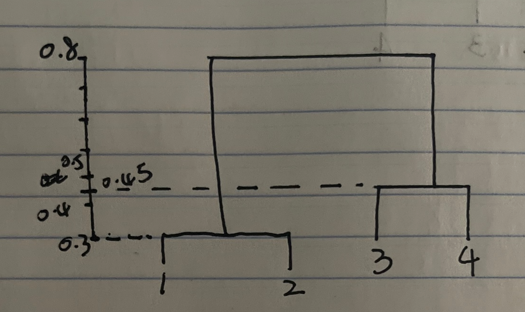

### (b)

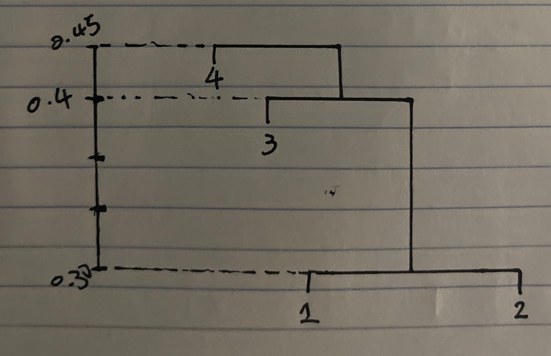

### (c)

Clusters:
"1,2" and "3,4"

### (d)

Clusters: 
"1,2,3" and "4"

### (e)

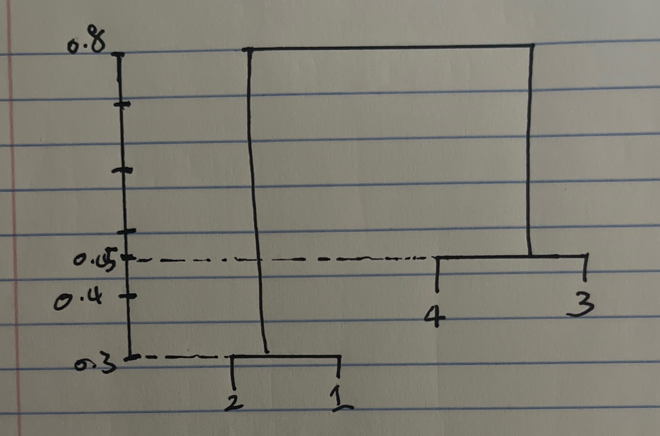